In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#df_train = pd.read_csv('../data/processed/train_clean.csv', sep=';')
df_train = pd.read_csv('../data/processed/train_processed.csv', sep=';')
print(len(df_train))

TARGET='churn'

79537


In [7]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

TARGET = 'churn'

#After checking there are no repeated Customer_ID values, that is not a relevant value even it is a number
df_train = df_train.drop(['Customer_ID'], axis=1)

# Separamos los tipos de columnas para analizarlas de forma diferente
categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_train.select_dtypes(include=['number']).columns.tolist()

# Nos aseguramos de que la variable objetivo no está en las listas de predictoras
if TARGET in numerical_cols:
    numerical_cols.remove(TARGET)
if TARGET in categorical_cols:
    categorical_cols.remove(TARGET)

print(f"Variable Objetivo: {TARGET}")
print(f"\nVariables Numéricas ({len(numerical_cols)}): {numerical_cols}")
print(f"\nVariables Categóricas ({len(categorical_cols)}): {categorical_cols}")

X_train = df_train.drop(['churn'], axis=1)
y_train = df_train['churn']


Variable Objetivo: churn

Variables Numéricas (75): ['Unnamed: 0', 'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'a

In [8]:
for col in numerical_cols:
    # Contamos el número de valores únicos no nulos
    unique_values = X_train[col].unique()
    
    # Comprobamos si tiene exactamente 2 valores únicos y si son 0 y 1
    if len(unique_values) == 2 and set(unique_values) == {0.0, 1.0}:
        # Si la condición se cumple, convertimos la columna a tipo 'category'
        X_train[col] = X_train[col].astype('category')
        print(f"Columna '{col}' convertida a tipo categórico.")
    #print(f"Numerical column {col} has {len(unique_values)} unique values:\n")

for col in categorical_cols:
    unique_values = X_train[col].unique()
    #Convert from object to category
    df_train[col] = X_train[col].astype('category')
    #print(f"Categorical {col} has {len(unique_values)} unique values\n")

# Separamos los tipos de columnas para analizarlas de forma diferente
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

print(categorical_cols, numerical_cols)

Columna 'infobase_null' convertida a tipo categórico.
['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'infobase_null'] ['Unnamed: 0', 'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Me

## Variables numéricas

In [9]:
# 1. Calculamos la matriz de correlación solo de las variables predictoras
corr_matrix_features = X_train[numerical_cols].corr().abs()

# 2. Creamos una máscara para seleccionar el triángulo superior de la matriz
#    Esto evita que veamos pares duplicados (ej. var_A con var_B y var_B con var_A)
upper_triangle = corr_matrix_features.where(np.triu(np.ones(corr_matrix_features.shape), k=1).astype(bool))

# 3. Buscamos los pares de variables que superen el umbral de correlación
umbral = 0.80
highly_correlated_pairs = upper_triangle.stack().reset_index()
highly_correlated_pairs.columns = ['Variable 1', 'Variable 2', 'Correlación']
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs['Correlación'] > umbral]

print(f"Pares de variables con una correlación mayor a {umbral}:")
if highly_correlated_pairs.empty:
    print("No se encontraron pares altamente correlacionados.")
else:
    print(highly_correlated_pairs)

Pares de variables con una correlación mayor a 0.8:
     Variable 1     Variable 2  Correlación
134    rev_Mean        avg3rev     0.922544
137    rev_Mean        avg6rev     0.841378
160    mou_Mean  plcd_vce_Mean     0.822115
164    mou_Mean  comp_vce_Mean     0.830663
171    mou_Mean  mou_cvce_Mean     0.860543
...         ...            ...          ...
2636    avg3qty        avg6mou     0.835420
2637    avg3qty        avg6qty     0.950959
2648    avg3rev        avg6rev     0.899665
2656    avg6mou        avg6qty     0.877411
2686     phones         models     0.890811

[101 rows x 3 columns]



Generando clustermap final para 55 variables...


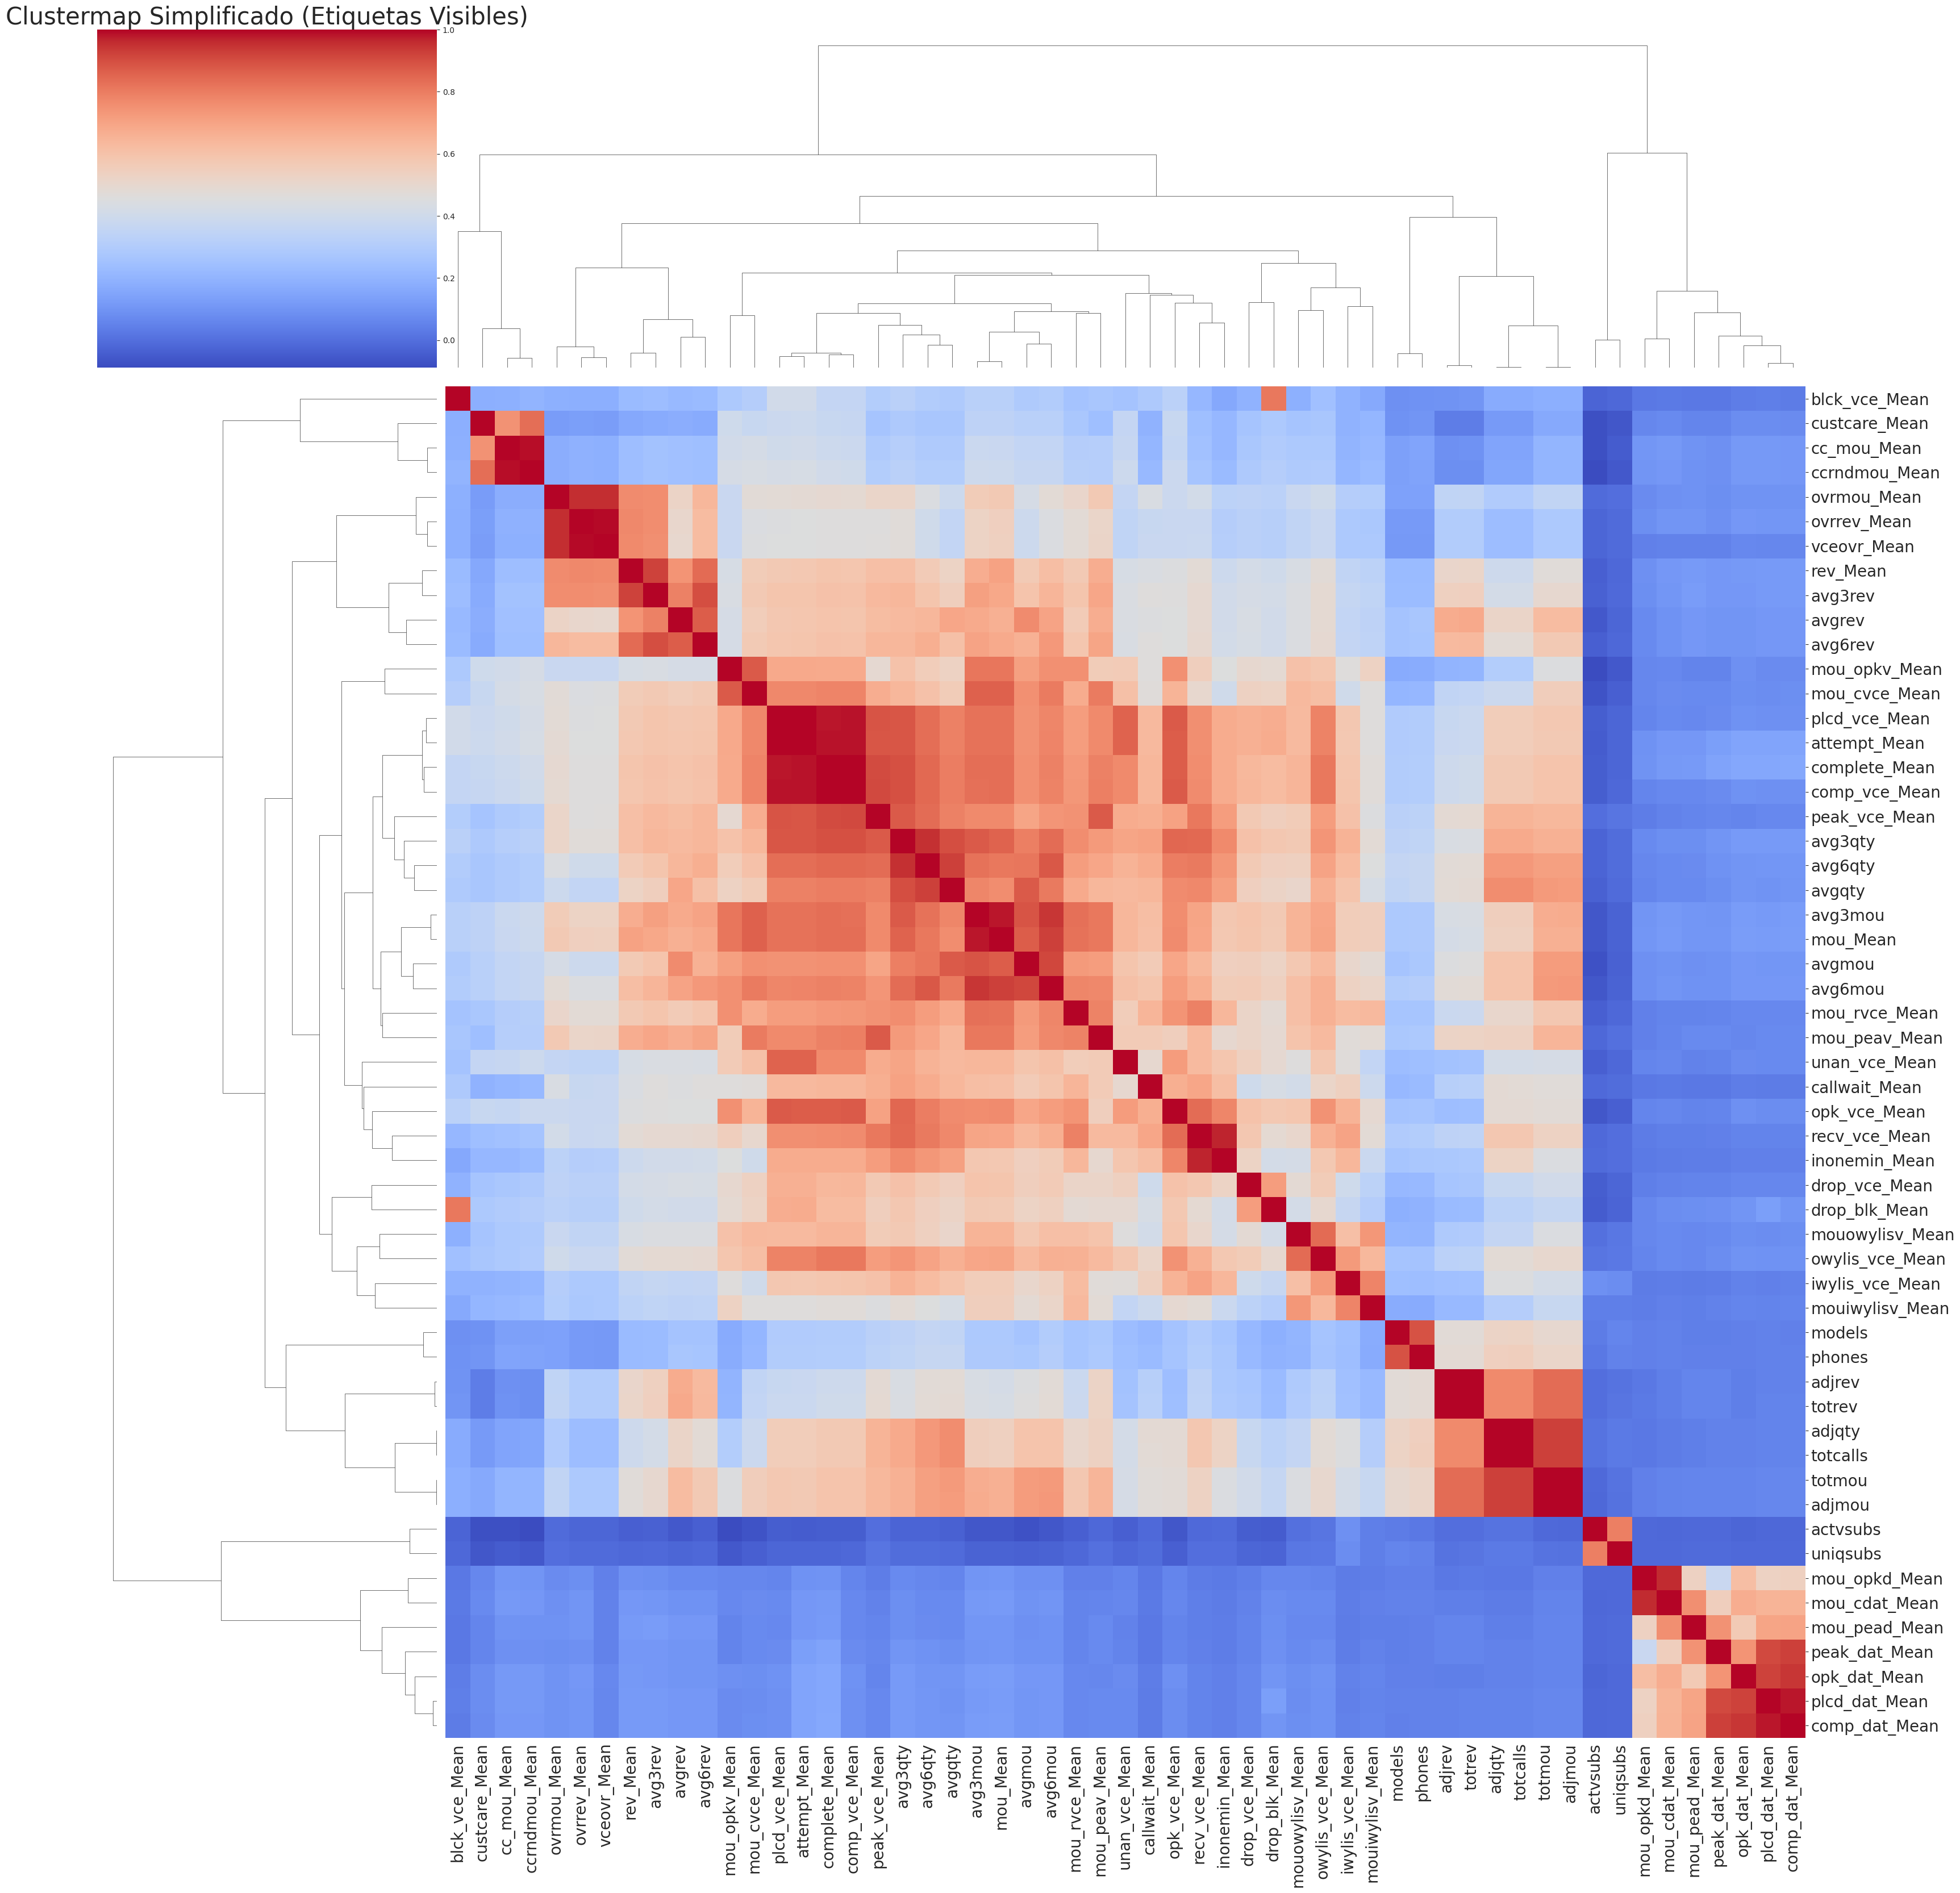

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Definir umbral y filtrar variables con alta correlación
umbral = 0.7
corr_matrix_full = X_train[numerical_cols].corr().abs()
variables_a_mantener = set()
for col in corr_matrix_full.columns:
    correlaciones_altas = corr_matrix_full.loc[corr_matrix_full.index != col, col]
    if (correlaciones_altas >= umbral).any():
        variables_a_mantener.add(col)
lista_filtrada = list(variables_a_mantener)

if not lista_filtrada:
    print("\nNo se encontraron variables que superen el umbral para graficar.")
else:
    corr_matrix_filtrada = X_train[lista_filtrada].corr()

    num_variables = len(lista_filtrada)
    figsize_ajustado = (max(10, num_variables * 0.6), max(10, num_variables * 0.6))

    print(f"\nGenerando clustermap final para {num_variables} variables...")
    
    g = sns.clustermap(
        corr_matrix_filtrada,
        cmap='coolwarm',
        annot=False,         
        figsize=figsize_ajustado
    )
    
    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90, fontsize=20)
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=20)

    plt.title('Clustermap Simplificado (Etiquetas Visibles)', fontsize=30)
    
    plt.tight_layout() 
    
    plt.show()



**Cluster 1 - Llamadas de voz:** desde `moulwysliv_Mean` hasta `plc_vce_Mean` vemos un cluster más o menos claro. Todas estas variables son referentes al uso que se da, ya sesa de intentos de llamada, media de minutos en un periodo de tiempo, media de llamadas, diferentes usos del servicio, etc. Por ejemplo, claramente `plcd_vce_Mean`, `attempt_Mean`, `complete_Mean` y `comp_vce_Mean` tiene sentido que tengan correlación porque implican las llamadas que se han intentado, las que se han intentado y han tenido lugar, el número de llamadas completadas, y el número de llamadas de voz completadas. tiene sentido, que cuantas más llamadas haya hecho un usuario, más se han logrado, más media hay, y más se han finalizado.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def analizar_correlacion_objetivo(X, y, top_n=10, figsize=(5, 5), title=None):
    # Asegurarse de que y tiene un nombre para la columna
    target_name = y.name if y.name else 'target'
    
    # 1. Combinar X e y en un solo DataFrame
    combined_df = pd.concat([X, y.rename(target_name)], axis=1)

    # 2. Calcular la matriz de correlación y seleccionar la columna del objetivo
    try:
        corr_with_target = combined_df.corr(numeric_only=True)[target_name]
    except KeyError:
        print(f"Error: La variable objetivo '{target_name}' no se encontró en la matriz de correlación.")
        return None

    # 3. Eliminar la correlación de la variable consigo misma y ordenar
    corr_with_target = corr_with_target.drop(target_name, errors='ignore').sort_values(ascending=False)
    
    # 4. Preparar los datos para la visualización (top N y bottom N)
    if len(corr_with_target) > top_n * 2:
        top_features = corr_with_target.head(top_n)
        bottom_features = corr_with_target.tail(top_n)
        features_to_plot = pd.concat([top_features, bottom_features])
    else:
        features_to_plot = corr_with_target

    # 5. Visualizar las correlaciones
    plt.figure(figsize=figsize)
    sns.barplot(x=features_to_plot.values, y=features_to_plot.index, palette="coolwarm", hue=features_to_plot.values)
    
    # Crear el título
    if title:
        plt.title(title, fontsize=16)
    else:
        plt.title(f'Top {top_n} Más y Menos Correlacionadas con "{target_name}"', fontsize=16)
        
    plt.xlabel('Coeficiente de Correlación de Pearson', fontsize=12)
    plt.ylabel('Características', fontsize=12)
    plt.tight_layout()
    plt.show()

    # 6. Imprimir las características más y menos correlacionadas
    #print(f"Top {top_n} características más correlacionadas (positivamente):")
    #print(corr_with_target.head(top_n))
    #print(f"\nTop {top_n} características menos correlacionadas (negativamente):")
    #print(corr_with_target.tail(top_n))
    
    # 7. Retornar la serie completa de correlaciones para uso posterior
    return corr_with_target

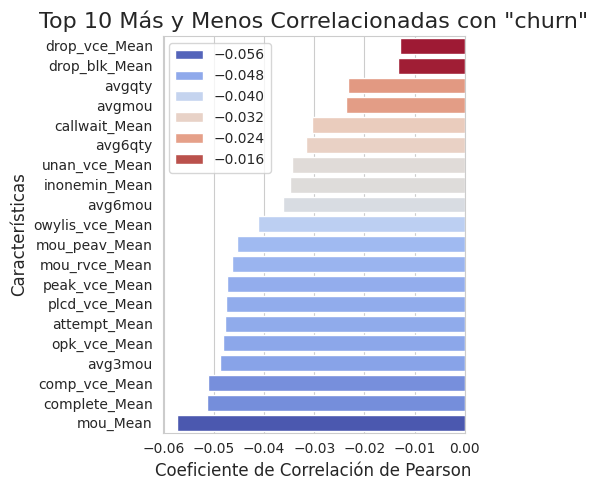

drop_vce_Mean     -0.012968
drop_blk_Mean     -0.013205
avgqty            -0.023182
avgmou            -0.023720
callwait_Mean     -0.030495
avg6qty           -0.031564
unan_vce_Mean     -0.034375
inonemin_Mean     -0.034759
avg6mou           -0.036244
owylis_vce_Mean   -0.041311
recv_vce_Mean     -0.041818
avg3qty           -0.043270
mou_peav_Mean     -0.045417
mou_rvce_Mean     -0.046410
peak_vce_Mean     -0.047459
plcd_vce_Mean     -0.047562
attempt_Mean      -0.047791
opk_vce_Mean      -0.048270
avg3mou           -0.048717
comp_vce_Mean     -0.051207
complete_Mean     -0.051370
mou_Mean          -0.057386
Name: churn, dtype: float64

In [ ]:
values = g.ax_heatmap.get_yticklabels()

#Obtain the fields of the first cluster
cluster_1 = [tick.get_text() for tick in values[13:35]]

analizar_correlacion_objetivo(X_train[cluster_1], y_train)


Claramente, la que más afecta es `mou_Mean`, permitiéndonos prescindir de las demás variables del cluster.

In [ ]:
var_1 = 'mou_Mean'

**Cluster 2 - Llamadas de datos:** desde `mou_cdat_Mean` hasta `plcd_dat_Mean`, relacionan los minutos de uso y el número de llamadas de **datos**, off-peak y peak. Tiene sentido que cuantas más llamadas de datos hagas, más minutos de uso tengas tanto en peak como en off-peak de llamadas de datos. Así como que cuantas más llamadas se hagan, más llamadas completas de datos habrá.


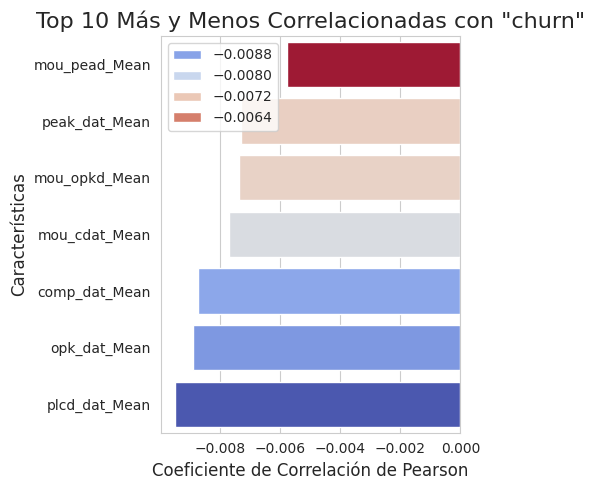

mou_pead_Mean   -0.005789
peak_dat_Mean   -0.007331
mou_opkd_Mean   -0.007372
mou_cdat_Mean   -0.007712
comp_dat_Mean   -0.008746
opk_dat_Mean    -0.008915
plcd_dat_Mean   -0.009514
Name: churn, dtype: float64

In [ ]:
cluster_2 = [tick.get_text() for tick in values[len(values)-7:(len(values))]]

analizar_correlacion_objetivo(X_train[cluster_2], y_train)

Aquí vemos que la que más influye es `plcd_dat_Mean`, que son el número de llamadas de datos realizadas.

In [ ]:
var_2 = 'plcd_dat_Mean'

**Cluster 3 - Uso extra:** desde `ovrmou_Mean` hasta `avg6rev`. Las variables referentes a `rev`, implican el beneficio de ese usuario, el dinero que haga pagado. El resto de variables, se refieren a servicios de `overage`, es decir, pagos extra. Tiene sentido que cuanto más uso hayan hecho de _overage_, más _revenue_ hayan proporcionado.


['ovrmou_Mean', 'vceovr_Mean', 'ovrrev_Mean', 'rev_Mean', 'avg3rev', 'avgrev', 'avg6rev']


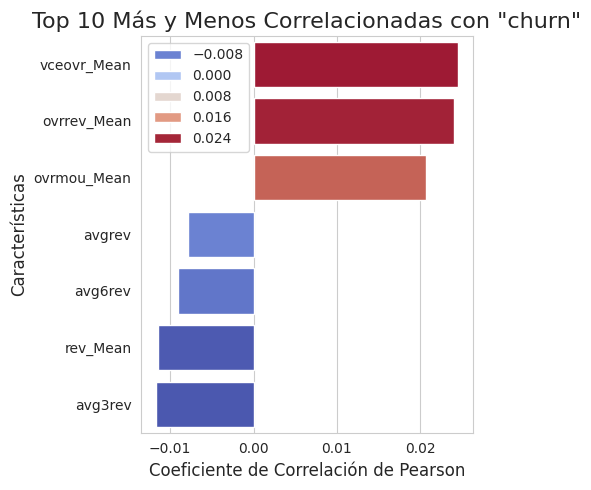

vceovr_Mean    0.024459
ovrrev_Mean    0.024058
ovrmou_Mean    0.020663
avgrev        -0.007911
avg6rev       -0.009011
rev_Mean      -0.011517
avg3rev       -0.011673
Name: churn, dtype: float64

In [ ]:
cluster_3 = [tick.get_text() for tick in values[4:11]]
print(cluster_3)
analizar_correlacion_objetivo(X_train[cluster_3], y_train)

En este caso, lo que más influye son los usuarios que han proporcionado mayor beneficio en _voice overage_ de media

In [ ]:
var_3 = 'vceovr_Mean'

**Cluster 4 - Uso y beneficio de toda la vida:** desde `totrev` a `adjmou` se refieren al uso y al pago referido al usuario durante toda su vida. Tiene sentido que cuantas más llamadas haya hecho el usuario, más beneficio de.


['totrev', 'adjrev', 'adjqty', 'totcalls', 'totmou', 'adjmou']


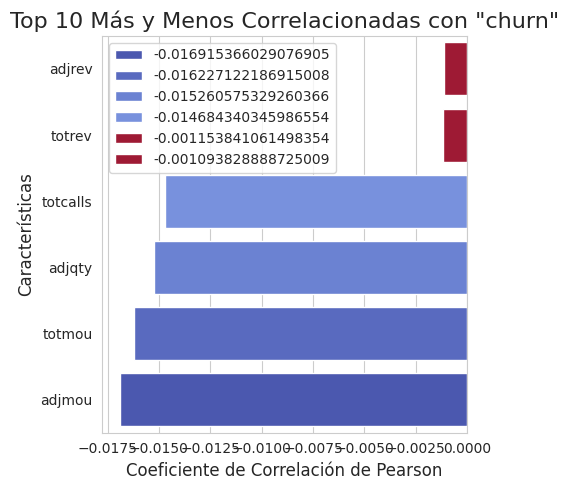

adjrev     -0.001094
totrev     -0.001154
totcalls   -0.014684
adjqty     -0.015261
totmou     -0.016227
adjmou     -0.016915
Name: churn, dtype: float64

In [ ]:
cluster_4 = [tick.get_text() for tick in values[(len(values)-15):(len(values)-9)]]
print(cluster_4)
analizar_correlacion_objetivo(X_train[cluster_4], y_train)

En este caso, afecta más el número de minutos de uso a lo largo de toda la suscripción del usuario.

In [ ]:
var_4 = 'adjmou'

**Cluster 5 - Customer care:** desde `custcare_Mean` hasta `ccrndmou_Mean`, todo referente al uso de atención al cliente. Cuantas más llamadas, más minutos se han usado.

['custcare_Mean', 'cc_mou_Mean', 'ccrndmou_Mean']


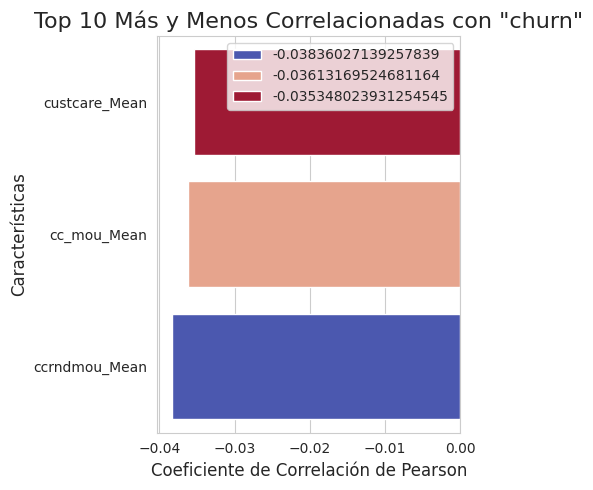

custcare_Mean   -0.035348
cc_mou_Mean     -0.036132
ccrndmou_Mean   -0.038360
Name: churn, dtype: float64

In [ ]:
cluster_5 = [tick.get_text() for tick in values[1:4]]
print(cluster_5)
analizar_correlacion_objetivo(X_train[cluster_5], y_train)

In [ ]:
var_5 = 'ccrndmou_Mean'

**Clusters 6 y 7 - Teléfonos y suscriptores:** apenas se les puede denominar clusteres, porque son grupos de dos variables. El primero, relacionando el número de teléfonos con el número de modelos de teléfono registrado, y el segundo relacionando el número de suscriptores únicos, con el número de suscriptores activos.

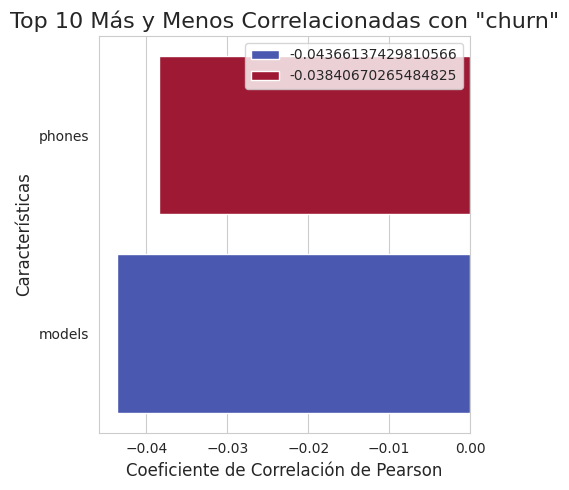

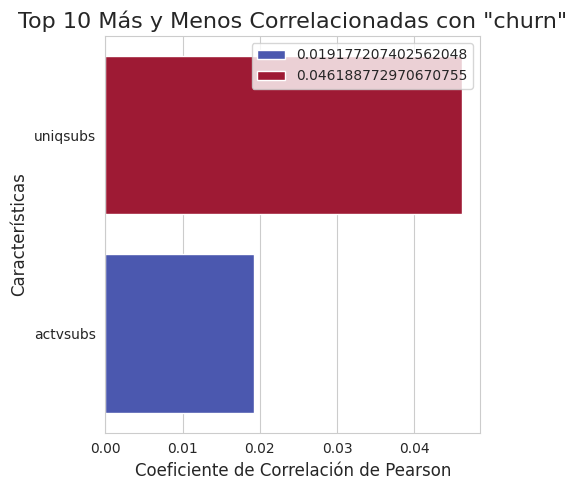

uniqsubs    0.046189
actvsubs    0.019177
Name: churn, dtype: float64

In [ ]:
cluster_6 = ['models', 'phones']

analizar_correlacion_objetivo(X_train[cluster_6], y_train)

cluster_7 = ['uniqsubs', 'actvsubs']

analizar_correlacion_objetivo(X_train[cluster_7], y_train)

In [ ]:
var_6 = 'models'
var_7 = 'uniqsubs'

numerical_filtered = [var_1, var_2, var_3, var_4, var_5, var_6, var_7]

## Variables categóricas

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

def analyze_categorical_relevance_chi2(X_train, y_train, alpha=0.05):
    """
    Realiza un test de Chi-cuadrado para analizar la relevancia de las variables 
    categóricas de un DataFrame en relación a una variable objetivo.

    Args:
        X_train (pd.DataFrame): DataFrame con las variables predictoras de entrenamiento.
        y_train (pd.Series): Serie con la variable objetivo de entrenamiento.
        alpha (float, optional): Nivel de significancia para determinar si una variable
                                 es irrelevante. Defaults to 0.05.

    Returns:
        pd.DataFrame: Un DataFrame con los resultados del test (Variable y p-valor),
                      ordenado por relevancia.
    """
    
    # 1. Identificar automáticamente las columnas categóricas
    categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if not categorical_cols:
        print("No se encontraron variables categóricas para analizar.")
        return pd.DataFrame()

    # 2. Realizar el test para cada variable
    chi2_results = []
    for feature in categorical_cols:
        # Crear la tabla de contingencia
        contingency_table = pd.crosstab(X_train[feature], y_train)
        
        # Realizar el test de Chi-cuadrado
        try:
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi2_results.append({'Variable': feature, 'p-valor': p})
        except ValueError:
            print(f"No se pudo calcular Chi-cuadrado para la variable '{feature}'. Se omite.")
    
    # 3. Convertir los resultados a un DataFrame y ordenarlos
    results_df = pd.DataFrame(chi2_results).sort_values(by='p-valor', ascending=True)

    # 4. Imprimir los resultados y las variables irrelevantes
    print("--- Análisis de Relevancia (Chi-cuadrado) vs. Variable Objetivo ---")
    print(results_df)

    irrelevantes = results_df[results_df['p-valor'] > alpha]
    if not irrelevantes.empty:
        print(f"\n--- Variables potencialmente irrelevantes (p-valor > {alpha}) ---")
        print(irrelevantes['Variable'].tolist())
    else:
        print(f"\nTodas las variables categóricas son relevantes (p-valor <= {alpha}).")
        
    return results_df

In [ ]:
relevance_report_categorical = analyze_categorical_relevance_chi2(X_train, y_train)

--- Análisis de Relevancia (Chi-cuadrado) vs. Variable Objetivo ---
             Variable        p-valor
7          hnd_webcap  1.387111e-145
2            asl_flag   8.416965e-83
1            crclscod   3.115777e-82
17             ethnic   7.337398e-58
5            dualband   7.665078e-54
27  change_rev_isnull   5.152051e-46
4                area   5.868406e-32
28     avg6rev_isnull   1.780861e-20
6          refurb_new   7.122739e-18
13           infobase   3.992315e-17
12            marital   2.783912e-15
24    infobase_isnull   6.523994e-14
30      adults_isnull   5.417143e-12
29         lor_isnull   7.801198e-12
11           dwlltype   3.965974e-11
25    rev_Mean_isnull   4.606931e-11
31      income_isnull   6.980290e-11
14           HHstatin   9.096220e-11
10            ownrent   2.788766e-09
26   hnd_price_isnull   6.380306e-09
3    prizm_social_one   2.425691e-07
23           creditcd   4.550669e-07
15           dwllsize   7.338899e-07
32    numbcars_isnull   2.834980e-04
18     

In [ ]:
categories_to_discard = ['numbcars_isnull', 'kid0_2', 'kid16_17', 'forgntvl', 'kid3_5', 'kid11_15', 'kid6_10', 'truck', 'new_cell', 'rv']

# Hacemos una copia para no modificar la lista original
categorical_cols_filtered = categorical_cols.copy()

for col in categories_to_discard:
    # Es más eficiente iterar sobre la lista corta de descarte
    if col in categorical_cols_filtered:
        # Simplemente llamamos a .remove(), sin reasignar
        categorical_cols_filtered.remove(col)

print("\nLista de categorías filtrada:")
print(categorical_cols_filtered)


Lista de categorías filtrada:
['crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd', 'infobase_isnull', 'rev_Mean_isnull', 'hnd_price_isnull', 'change_rev_isnull', 'avg6rev_isnull', 'lor_isnull', 'adults_isnull', 'income_isnull']


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Importaciones necesarias para la función ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from tqdm.notebook import tqdm # Para una barra de progreso visual

def plot_cramers_v_heatmap(df, categorical_cols=None, figsize=(12, 10)):
    """
    Calcula y visualiza un heatmap de la V de Cramér para medir la asociación
    entre las variables categóricas de un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos.
        categorical_cols (list, optional): Una lista de las columnas a analizar. 
                                           Si es None, se auto-detectan. Defaults to None.
        figsize (tuple, optional): El tamaño de la figura para el plot. Defaults to (12, 10).
    """
    
    # 1. Identificar las columnas categóricas si no se proporcionan
    if categorical_cols is None:
        print("Detectando columnas categóricas automáticamente...")
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        
    if not categorical_cols:
        print("No se encontraron variables categóricas para analizar.")
        return

    print(f"Analizando {len(categorical_cols)} variables categóricas...")

    # 2. Función interna para calcular V de Cramér
    def cramers_v(x, y):
        """ Calcula la V de Cramér entre dos series categóricas. """
        confusion_matrix = pd.crosstab(x, y)
        if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
            return 0  # No hay asociación si una variable es constante
            
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        
        # Corrección de bias
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        
        if min((kcorr-1), (rcorr-1)) == 0:
            return 0
            
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    # 3. Calcular la matriz de V de Cramér
    cramers_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols, dtype=float)
    
    # Usamos tqdm para ver una barra de progreso, ya que puede ser lento
    for col1 in tqdm(categorical_cols, desc="Calculando V de Cramér"):
        for col2 in categorical_cols:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1].astype(str), df[col2].astype(str))
            
    print("Matriz calculada.")

    # 4. Visualizar la matriz con un heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cramers_matrix, annot=False, cmap='viridis', fmt=".2f")
    plt.title('Heatmap de Redundancia Categórica (V de Cramér)')
    plt.show()
    
    return cramers_matrix

Detectando columnas categóricas automáticamente...
Analizando 33 variables categóricas...


Calculando V de Cramér:   0%|          | 0/33 [00:00<?, ?it/s]

Matriz calculada.


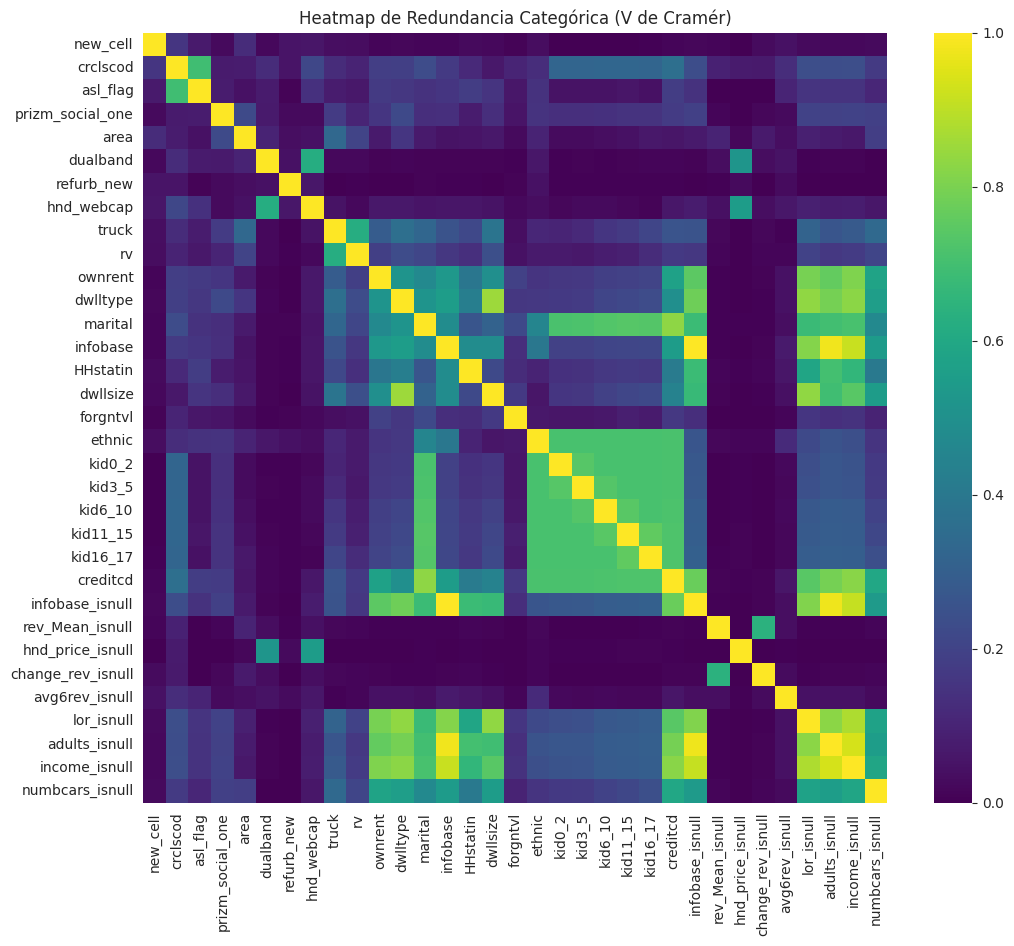

In [ ]:
# Asumimos que 'X_train' es tu DataFrame de entrenamiento
# con las columnas categóricas en su formato original (antes del One-Hot Encoding).

# --- Ejecutar el análisis de V de Cramér ---
# La función se encargará de todo: detectar las columnas, calcular y pintar.
cramers_results = plot_cramers_v_heatmap(X_train)

Observando estas correlaciones con la V de Cramer, no vemos nada realmente nuevo. Observamos clusteres muy claros, pero lo que está sucediendo es que se está observando correlación entre las variables `_isnull` y las variables que representan. Por ejemplo, sabemos que cuando `infobase_isnull`, también son nulas las categorías `marital`, `ethnic`, etc. Por lo tanto, hay correlación con la variable 'UNKN'. Es decir: todas las variables `isnull` que tienen esta relaci´ón se podrían eliminar, porque son redundantes. En este caso, la primera que aparece como relevante, es `infobase_isnull`. Sin embargo, sabemos que `infobase` en el caso de ser nula, fue imputada con la categoría 'UNKN', con lo cual, `infobase_null` es un mapeo de esta variable, por lo tanto también es redundante y podríamos prescindir de ella.

Vemos es correlación entre `dualband`, `hnd_webcap` y `hnd_price_isnull`: tiene sentido, que sea dualband influye en la capacidad web del dispositivo, y eso hace que sea más caro. La primera que aparece como relevante es `hnd_webcap`, así que podemos prescindir tanto de `dualband` como de `hnd_price_isnull`.

También hay relación `rev_Mean_isnull` con `change_rev_isnull`, tiene sentido también porque igual `change_rev` se calcula cuando se conoce `rev_Mean`, y si es nula, no se podrá calcular. Se elimina `rev_Mean_isnull` porque su resultado p-valor es menor.

Vemos también que `asl_flag` tiene correlación con `crclscod`. Sin embargo no eliminamos ninguna porque `crclscod` tiene muchísimas más categorías y ambas son altamente predictivas con el churn.

Análisis de Relevancia (Chi-cuadrado) vs. Churn:

             Variable        p-valor

7          hnd_webcap  1.387111e-145

2          asl_flag   8.416965e-83

1          crclscod   3.115777e-82

17             ethnic   7.337398e-58

~~5          ~dualband   7.665078e-54~~

27  change_rev_isnull   5.152051e-46

4                area   5.868406e-32

28     avg6rev_isnull   1.780861e-20

6          refurb_new   7.122739e-18

13           infobase   3.992315e-17

12            marital   2.783912e-15

~~24    ~infobase_isnull   6.523994e-14~~

~~30      ~adults_isnull   5.417143e-12~~

~~29         ~lor_isnull   7.801198e-12~~

11           dwlltype   3.965974e-11

~~25    ~rev_Mean_isnull   4.606931e-11~~

~~31      income_isnull   6.980290e-11~~

14           HHstatin   9.096220e-11

10            ownrent   2.788766e-09

~~26   ~hnd_price_isnull   6.380306e-09~~

3    prizm_social_one   2.425691e-07

23           creditcd   4.550669e-07

15           dwllsize   7.338899e-07

In [ ]:
categories_to_discard_2 = ['dualband', 'infobase_isnull', 'adults_isnull', 'lor_isnull', 'rev_Mean_isnull', 'hnd_price_isnull', 'income_isnull']

# Hacemos una copia para no modificar la lista original
categorical_cols_filtered_2 = categorical_cols_filtered.copy()

for col in categories_to_discard_2:
    # Es más eficiente iterar sobre la lista corta de descarte
    if col in categorical_cols_filtered_2:
        # Simplemente llamamos a .remove(), sin reasignar
        categorical_cols_filtered_2.remove(col)


columns_to_use = numerical_filtered+categorical_cols_filtered_2

print(columns_to_use)

['mou_Mean', 'plcd_dat_Mean', 'vceovr_Mean', 'adjmou', 'ccrndmou_Mean', 'models', 'uniqsubs', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd', 'change_rev_isnull', 'avg6rev_isnull']


In [ ]:
import json

with open('../data/processed/imputation_values.json', 'r') as f:
    imputation_values = json.load(f)

with open('../airflow/config/churn_pipeline_config.json', 'r') as f:
    config = json.load(f)

print(config)

{'preprocessing': {'row_removal': {'null_subset_cols': ['dualband', 'area', 'models']}, 'negative_values': {'exception_cols': ['change_rev', 'change_mou']}, 'imputation': {'zero_fill_patterns': {'endswith': ['_Mean'], 'startswith': ['change_', 'avg6']}, 'zero_fill_exact_columns': ['truck', 'rv', 'forgntvl'], 'median_fill_columns': ['hnd_price', 'lor', 'adults', 'income', 'numbcars'], 'categorical_fill_value': 'UNKN'}, 'null_flags': {'columns': ['infobase', 'rev_Mean', 'hnd_price', 'change_rev', 'avg6rev', 'lor', 'adults', 'income', 'numbcars']}}, 'feature_selection': {'k': 50, 'method': 'RandomForest'}, 'model_training': {'model_name': 'RandomForestClassifier', 'n_estimators': 150}}


In [ ]:
from churn_library import processing_helpers

null_subset_cols = config['preprocessing']['row_removal']['null_subset_cols']

negative_exception_cols = config['preprocessing']['negative_values']['exception_cols']

zero_fill_config = {
        'patterns': config['preprocessing']['imputation'].get('zero_fill_patterns', {}),
        'exact_columns': config['preprocessing']['imputation'].get('zero_fill_exact_columns', [])
    }
median_fill_imputation_pattern = config['preprocessing']['imputation']['median_fill_columns']

categorical_fill_value = config['preprocessing']['imputation']['categorical_fill_value']

null_flags_columns = config['preprocessing']['null_flags']['columns']

#    remove_null_rows >> clean_negatives >> create_null_flags >> impute_zeros >> calculate_imputation_values >> apply_imputation >> impute_categoricals

In [ ]:
from churn_library.processing_helpers import (
    find_columns_for_imputation, 
    impute_with_constant, 
    create_null_flags,
    remove_rows_with_any_null,
    clean_negatives)

df_test = pd.read_csv('../data/raw/test.csv', sep=';')
print(f"Initial nulls \n{df_test.isnull().sum().sum()}")

df_test = remove_rows_with_any_null(df_test, null_subset_cols)
print(f"After cleaning rows with given nulls \n{df_test.isnull().sum().sum()}")

df_test = clean_negatives(df_test, negative_exception_cols)
print(f"After cleaning negatives \n{df_test.isnull().sum().sum()}")

df_test = create_null_flags(df_test, null_flags_columns)

# Usamos la función inteligente de la librería para encontrar las columnas
cols_for_zero = find_columns_for_imputation(df_test, zero_fill_config)
df_test = impute_with_constant(df_test, cols_for_zero, fill_value=0)
print(f"After imputing with 0 \n{df_test.isnull().sum().sum()}")

for col in imputation_values.keys():
    value = imputation_values[col]
    df_test[col] = df_test.fillna({col: value}, inplace=True)
print(f"After filling with median \n {df_test.isnull().sum().sum()}")

fill_value = config['preprocessing']['imputation']['categorical_fill_value']
cols_for_unkn = df_test.select_dtypes(include=['object', 'category']).columns.tolist()
df_test = impute_with_constant(df_test, cols_for_unkn, fill_value=fill_value)

print("Número de valores nulos restantes en df_test por columna:")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])
print(f"Total de valores nulos restantes en df_test: {df_test.isnull().sum().sum()}")


Initial nulls 
67972
After cleaning rows with given nulls 
67935
- totmrc_Mean: 2 negative values
- eqpdays: 20 negative values
       totmrc_Mean  eqpdays
94         79.9900     -1.0
2051       -6.0500    119.0
4561       62.2825     -1.0
5084       74.9925     -2.0
5762       51.9800     -3.0
6131       42.1675     -4.0
8278       30.0000     -2.0
9772       44.9900     -1.0
10301      74.9900     -3.0
13040      44.9900     -3.0
14348      74.9900     -3.0
14488     152.4750     -3.0
15249      47.0075     -2.0
15981      44.8225     -1.0
16522      84.9900     -2.0
16549      34.9800     -4.0
16960      32.9900     -2.0
17445      -0.0825    369.0
17454      29.9900     -1.0
17997      41.2425     -1.0
18452      49.9900     -3.0
18612      59.9900     -1.0

--- Cleaning negative values (if applicable) ---
Original dataset length: 19990
Length after cleaning negatives: 19968
Deleted rows: 22
After cleaning negatives 
67821
Imputed 56 columns with constant value: '0'
After imputing 

/home/paloma/churn-estimation/churn_library/processing_helpers.py:120: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
y_test = df_test['churn']
X_test = df_test.drop(['churn'], axis=1)
X_test = X_test.drop(['Customer_ID'], axis=1)

In [ ]:
X_train_encoded_filtered = pd.get_dummies(X_train[columns_to_use], columns=categorical_cols_filtered_2, drop_first=True)
X_test_encoded_filtered = pd.get_dummies(X_test[columns_to_use], columns=categorical_cols_filtered_2, drop_first=True)

## Tenemos que alinear el hot-encoded de train y test
final_train_columns = X_train_encoded_filtered.columns
X_test_aligned_filtered = X_test_encoded_filtered.reindex(columns=final_train_columns, fill_value=0)
print("Dimensiones de X_train_encoded:", X_train_encoded_filtered.shape)
print("Dimensiones de X_test_aligned:", X_test_aligned_filtered.shape)


Dimensiones de X_train_encoded: (79830, 140)
Dimensiones de X_test_aligned: (19968, 140)


In [ ]:
print(columns_to_use)

['mou_Mean', 'plcd_dat_Mean', 'vceovr_Mean', 'adjmou', 'ccrndmou_Mean', 'models', 'uniqsubs', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'creditcd', 'change_rev_isnull', 'avg6rev_isnull']


In [ ]:
# --- Importaciones para la función ---
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import time

def train_and_evaluate_model(model_name, hyperparameters, X_train, y_train, X_test, y_test):
    """
    Realiza validación cruzada, entrena y evalúa un modelo de clasificación.
    (Versión 2.0 con Cross-Validation y Regresión Logística)
    """
    
    print("\n" + "="*60)
    print(f"--- PROCESANDO MODELO: {model_name} ---")
    print("="*60)
    
    # 1. SELECCIÓN DEL MODELO
    if model_name == 'RandomForest':
        model = RandomForestClassifier(**hyperparameters)
    elif model_name == 'XGBoost':
        model = XGBClassifier(**hyperparameters)
    elif model_name == 'LightGBM':
        model = LGBMClassifier(**hyperparameters)
    elif model_name == 'LogisticRegression':
        hyperparameters.setdefault('max_iter', 2000)
        model = LogisticRegression(**hyperparameters)
    else:
        raise ValueError("Modelo no reconocido.")

    # --- 2. VALIDACIÓN CRUZADA (SOBRE EL TRAIN SET) ---
    print(f"\nEjecutando Cross-Validation para {model_name} (puede tardar)...")
    start_time = time.time()
    
    # Usamos cv=5 para una evaluación robusta
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    
    cv_duration = time.time() - start_time
    print(f"Validación cruzada completada en {cv_duration:.2f} segundos.")
    
    # --- 3. ENTRENAMIENTO FINAL (CON TODO EL TRAIN SET) ---
    print(f"\nEntrenando {model_name} con todos los datos de entrenamiento...")
    model.fit(X_train, y_train)
    print("¡Modelo final entrenado!")

    # --- 4. PREDICCIÓN Y EVALUACIÓN (SOBRE EL TEST SET) ---
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    auc_test = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'], output_dict=True)
    f1_churn = report['Churn']['f1-score']
    
    print(f"\n--- AUC Medio en Cross-Validation: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f}) ---")
    print(f"--- AUC en Test Set: {auc_test:.4f} ---")
    
    # --- 5. MATRIZ DE CONFUSIÓN ---
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap='plasma')
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()
    
    # --- 6. DEVOLVER RESULTADOS ---
    results = {
        'model_name': model_name,
        'AUC_CV_Mean': np.mean(cv_scores),
        'AUC_Test': auc_test,
        'F1-Score_Churn': f1_churn
    }
    
    return results

In [ ]:
# --- 1. PREPARACIÓN DE PARÁMETROS ---

# Parámetros para manejar clases desbalanceadas
try:
    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
except IndexError:
    scale_pos_weight = 1

# Diccionarios de hiperparámetros para cada modelo
# Por ahora los dejamos con los básicos, pero aquí puedes experimentar
rf_params = {
    'n_estimators': 100,
    'random_state': 42,
    'n_jobs': -1,
    'class_weight': 'balanced'
}

xgb_params = {
    'n_estimators': 100,
    'random_state': 42,
    'n_jobs': -1,
    'scale_pos_weight': scale_pos_weight,
    'eval_metric': 'logloss'
}

lgbm_params = {
    'n_estimators': 100,
    'random_state': 42,
    'n_jobs': -1,
    'class_weight': 'balanced'
}


Ajustando el escalador con los datos de X_train_final...
Transformando X_train_final y X_test_final...
¡Datos escalados y listos!

--- PROCESANDO MODELO: RandomForest ---

Ejecutando Cross-Validation para RandomForest (puede tardar)...
Validación cruzada completada en 13.28 segundos.

Entrenando RandomForest con todos los datos de entrenamiento...
¡Modelo final entrenado!

--- AUC Medio en Cross-Validation: 0.6065 (+/- 0.0045) ---
--- AUC en Test Set: 0.6066 ---


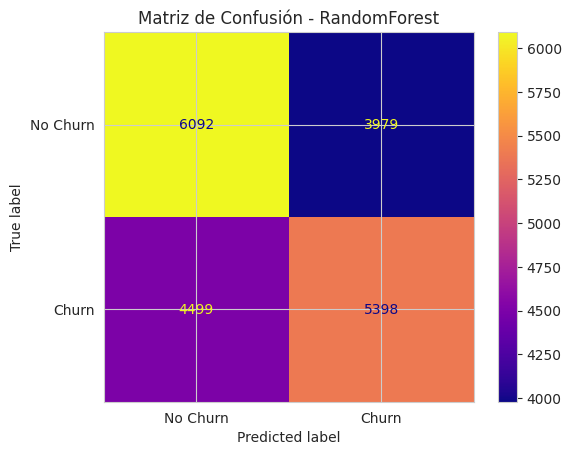


--- PROCESANDO MODELO: XGBoost ---

Ejecutando Cross-Validation para XGBoost (puede tardar)...
Validación cruzada completada en 10.86 segundos.

Entrenando XGBoost con todos los datos de entrenamiento...
¡Modelo final entrenado!

--- AUC Medio en Cross-Validation: 0.6199 (+/- 0.0043) ---
--- AUC en Test Set: 0.6298 ---


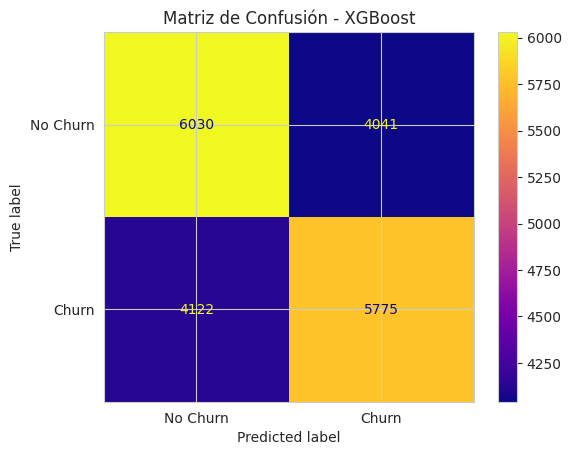


--- PROCESANDO MODELO: LightGBM ---

Ejecutando Cross-Validation para LightGBM (puede tardar)...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31663, number of negative: 32201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 63864, number of used features: 124
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 31663, number of negative: 32201
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002109 seconds.
You can 

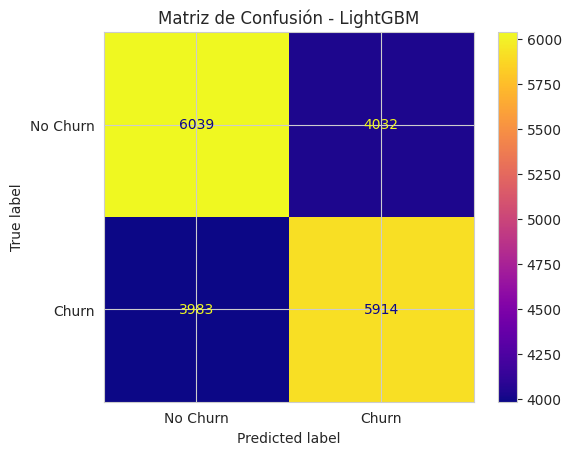


--- PROCESANDO MODELO: LogisticRegression ---

Ejecutando Cross-Validation para LogisticRegression (puede tardar)...
Validación cruzada completada en 2.17 segundos.

Entrenando LogisticRegression con todos los datos de entrenamiento...
¡Modelo final entrenado!


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- crclscod_ZF
Feature names seen at fit time, yet now missing:
- crclscod_A3
- crclscod_EF
- crclscod_L
- crclscod_S
- crclscod_V


In [ ]:
# --- 2. EJECUCIÓN DEL TORNEO ---
print("¡Datos escalados y listos!")

all_results = []
rf_results = train_and_evaluate_model('RandomForest', rf_params, X_train_encoded_filtered, y_train, X_test_aligned_filtered, y_test)
all_results.append(rf_results)

xgb_results = train_and_evaluate_model('XGBoost', xgb_params, X_train_encoded_filtered, y_train, X_test_aligned_filtered, y_test)
all_results.append(xgb_results)

lgbm_results = train_and_evaluate_model('LightGBM', lgbm_params, X_train_encoded_filtered, y_train, X_test_aligned_filtered, y_test)
all_results.append(lgbm_results)


### Mejora de features

Dado que no se han obtenido grandísimos resultados, podría ser debido a la gran cantidad de categorías presentes en muchas de las variables categóricas que estamos manejando. Vamos a intentar hacer primero lo mismo únicamente con variables numéricas, y después, intentaremos ver cómo mejorar las categóricas.


--- ENTRENANDO Y EVALUANDO MODELO: RandomForest ---
Entrenando RandomForest...
¡Modelo entrenado!

--- AUC en Test: 0.5635 ---

--- Informe de Clasificación en Test ---
              precision    recall  f1-score   support

    No Churn       0.54      0.57      0.56     10071
       Churn       0.54      0.52      0.53      9897

    accuracy                           0.54     19968
   macro avg       0.54      0.54      0.54     19968
weighted avg       0.54      0.54      0.54     19968



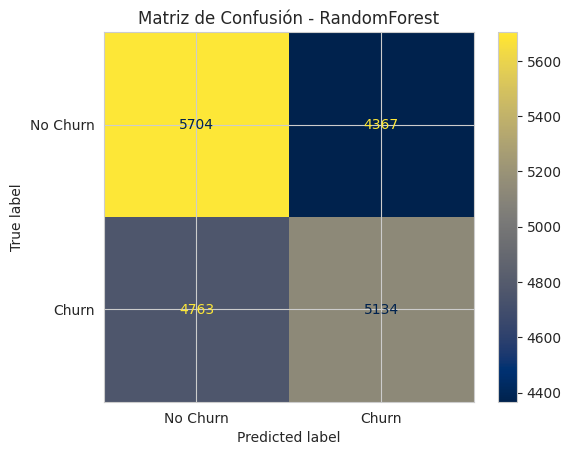


--- ENTRENANDO Y EVALUANDO MODELO: XGBoost ---
Entrenando XGBoost...
¡Modelo entrenado!

--- AUC en Test: 0.6017 ---

--- Informe de Clasificación en Test ---
              precision    recall  f1-score   support

    No Churn       0.58      0.57      0.57     10071
       Churn       0.57      0.57      0.57      9897

    accuracy                           0.57     19968
   macro avg       0.57      0.57      0.57     19968
weighted avg       0.57      0.57      0.57     19968



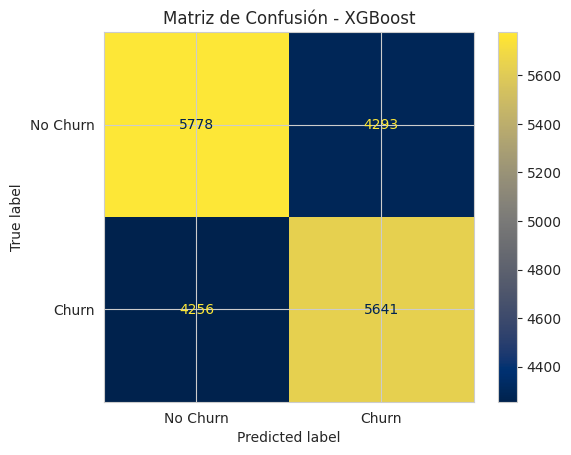


--- ENTRENANDO Y EVALUANDO MODELO: LightGBM ---
Entrenando LightGBM...
[LightGBM] [Info] Number of positive: 39578, number of negative: 40252
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1301
[LightGBM] [Info] Number of data points in the train set: 79830, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
¡Modelo entrenado!

--- AUC en Test: 0.6115 ---

--- Informe de Clasificación en Test ---
              precision    recall  f1-score   support

    No Churn       0.58      0.60      0.59     10071
       Churn       0.58      0.56      0.57      9897

    accuracy                           0.58     19968
   macro avg       0.58      0.58      0.58     19968
weighted avg       0.58      0.58      0.58     19968



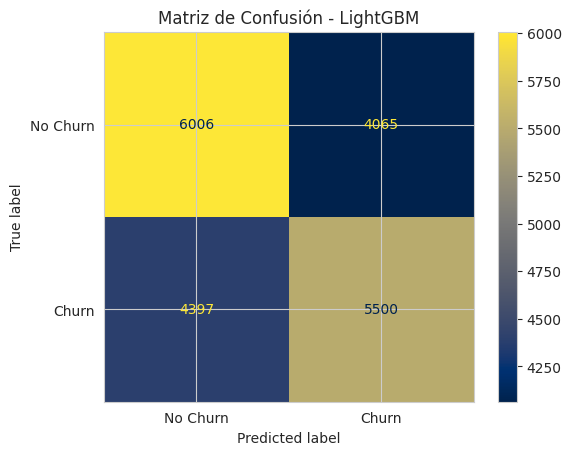

In [ ]:
all_results = []

X_train_encoded_numerical = X_train[numerical_filtered]
X_test_encoded_numerical = X_test[numerical_filtered]

rf_results = train_and_evaluate_model('RandomForest', rf_params, X_train_encoded_numerical, y_train, X_test_encoded_numerical, y_test)
all_results.append(rf_results)

xgb_results = train_and_evaluate_model('XGBoost', xgb_params, X_train_encoded_numerical, y_train, X_test_encoded_numerical, y_test)
all_results.append(xgb_results)

lgbm_results = train_and_evaluate_model('LightGBM', lgbm_params, X_train_encoded_numerical, y_train, X_test_encoded_numerical, y_test)
all_results.append(lgbm_results)

### Mejora de categorización

En grupos con muchas categorías, obtenemos poca representación de cada una de ellas. Así que agrupamos aquellas categorías más raras.

In [ ]:
import pandas as pd
from typing import List

def group_rare_categories(df, categorical_cols, threshold=0.01):
    """
    Agrupa las categorías que aparecen con poca frecuencia en una nueva categoría 'Other'.
    (Versión mejorada que ignora las variables binarias).
    """
    df_out = df.copy()
    print("--- Agrupando categorías raras (ignorando variables binarias) ---")
    for col in categorical_cols:
        if col in df_out.columns:
            # --- ¡NUEVA CONDICIÓN! ---
            # Solo procesamos la columna si tiene MÁS de 2 categorías únicas.
            if df_out[col].nunique(dropna=True) > 2:
                # Calcula la frecuencia de cada categoría
                frequencies = df_out[col].value_counts(normalize=True)
                
                # Identifica las categorías raras
                rare_categories = frequencies[frequencies < threshold].index
                
                if len(rare_categories) > 0:
                    print(f"  En la columna '{col}', agrupando {len(rare_categories)} categorías raras en 'Other'...")
                    # Reemplaza todas las categorías raras por la etiqueta 'Other'
                    df_out[col] = df_out[col].replace(rare_categories, 'Other')
            else:
                print(f"  La columna '{col}' es binaria. Se omite la agrupación.")
        else:
            print(f"Advertencia: La columna categórica '{col}' no se encontró.")

    return df_out


In [ ]:
def learn_and_save_rare_categories(df, categorical_cols, output_path, threshold=0.01):
    """
    Aprende qué categorías son raras en el set de entrenamiento y guarda el mapeo en un fichero JSON.

    Args:
        df (pd.DataFrame): El DataFrame de ENTRENAMIENTO.
        categorical_cols (list): La lista de columnas categóricas a analizar.
        output_path (str): La ruta donde se guardará el fichero JSON con el mapeo.
        threshold (float, optional): Umbral de frecuencia para considerar una categoría como rara.
    """
    print("--- Aprendiendo qué categorías son raras del set de entrenamiento... ---")
    rare_categories_map = {}
    
    for col in categorical_cols:
        if col in df.columns:
            frequencies = df[col].value_counts(normalize=True)
            rare_ones = frequencies[frequencies < threshold].index.tolist()
            
            if rare_ones:
                rare_categories_map[col] = rare_ones
                print(f"  En '{col}', se han identificado {len(rare_ones)} categorías raras.")

    print(f"\nGuardando el mapeo de categorías raras en: {output_path}")
    with open(output_path, 'w') as f:
        json.dump(rare_categories_map, f, indent=4)
        
    return rare_categories_map

In [ ]:
def apply_rare_grouping(df, rare_categories_map):
    """
    Aplica la agrupación de categorías raras a un DataFrame usando un mapeo pre-aprendido.
    """
    df_out = df.copy()
    print("--- Aplicando agrupación de categorías raras... ---")
    
    for col, rare_list in rare_categories_map.items():
        if col in df_out.columns:
            # Reemplaza todas las categorías de la lista por 'Other'
            df_out[col] = df_out[col].replace(rare_list, 'Other')
            print(f"  Agrupación aplicada en la columna '{col}'.")
            
    return df_out

In [ ]:
categorical_cols_to_analyze = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
rare_categories_path = '../data/processed/rare_categories_map.json'

# Ejecutamos la función de aprendizaje
rare_map = learn_and_save_rare_categories(X_train, categorical_cols_to_analyze, rare_categories_path)


# --- 2. APLICAR LAS REGLAS A AMBOS DATASETS ---
# Ahora que tenemos la receta, la aplicamos a ambos datasets

print("\nAplicando reglas al set de entrenamiento...")
X_train_grouped = apply_rare_grouping(X_train, rare_map)

print("\nAplicando reglas al set de prueba...")
X_test_grouped = apply_rare_grouping(X_train, rare_map)

--- Aprendiendo qué categorías son raras del set de entrenamiento... ---
  En 'crclscod', se han identificado 44 categorías raras.
  En 'dualband', se han identificado 1 categorías raras.
  En 'hnd_webcap', se han identificado 1 categorías raras.
  En 'infobase', se han identificado 1 categorías raras.
  En 'HHstatin', se han identificado 1 categorías raras.
  En 'dwllsize', se han identificado 10 categorías raras.
  En 'ethnic', se han identificado 5 categorías raras.
  En 'rev_Mean_isnull', se han identificado 1 categorías raras.
  En 'hnd_price_isnull', se han identificado 1 categorías raras.
  En 'change_rev_isnull', se han identificado 1 categorías raras.

Guardando el mapeo de categorías raras en: ../data/processed/rare_categories_map.json

Aplicando reglas al set de entrenamiento...
--- Aplicando agrupación de categorías raras... ---
  Agrupación aplicada en la columna 'crclscod'.
  Agrupación aplicada en la columna 'dualband'.
  Agrupación aplicada en la columna 'hnd_webcap'.
 

/tmp/ipykernel_5859/2989686093.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_out[col] = df_out[col].replace(rare_list, 'Other')
/tmp/ipykernel_5859/2989686093.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_out[col] = df_out[col].replace(rare_list, 'Other')
/tmp/ipykernel_5859/2989686093.py:11: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instea

In [ ]:
from utils import graficar_distribuciones_categoricas

X_train_grouped = group_rare_categories(X_train, categorical_cols, threshold=0.01)

relevance_report_grouped = analyze_categorical_relevance_chi2(X_train_grouped, y_train)

--- Agrupando categorías raras (ignorando variables binarias) ---
  En la columna 'crclscod', agrupando 44 categorías raras en 'Other'...
  La columna 'asl_flag' es binaria. Se omite la agrupación.
  En la columna 'dualband', agrupando 1 categorías raras en 'Other'...
  La columna 'refurb_new' es binaria. Se omite la agrupación.
  En la columna 'hnd_webcap', agrupando 1 categorías raras en 'Other'...
  La columna 'truck' es binaria. Se omite la agrupación.
  La columna 'rv' es binaria. Se omite la agrupación.
  En la columna 'infobase', agrupando 1 categorías raras en 'Other'...
  En la columna 'HHstatin', agrupando 1 categorías raras en 'Other'...
  En la columna 'dwllsize', agrupando 10 categorías raras en 'Other'...
  La columna 'forgntvl' es binaria. Se omite la agrupación.
  En la columna 'ethnic', agrupando 5 categorías raras en 'Other'...
  La columna 'infobase_isnull' es binaria. Se omite la agrupación.
  La columna 'rev_Mean_isnull' es binaria. Se omite la agrupación.
  La col

In [ ]:
#categories_to_discard_grouped = ['kid11_15', 'kid6_10', 'truck', 'area', 'new_cell', 'kid0_2', 'rv', 'kid3_5', 'infobase_isnull', 'adults_isnull', 'lor_isnull', 'rev_Mean_isnull', 'hnd_price_isnull', 'income_isnull']
categories_to_discard_grouped = ['kid11_15', 'kid6_10', 'truck', 'new_cell', 'rv', 'infobase_isnull', 'adults_isnull', 'lor_isnull', 'rev_Mean_isnull', 'hnd_price_isnull', 'income_isnull']
# Hacemos una copia para no modificar la lista original
categorical_cols_filtered_grouped = categorical_cols.copy()

for col in categories_to_discard_grouped:
    # Es más eficiente iterar sobre la lista corta de descarte
    if col in categorical_cols_filtered:
        # Simplemente llamamos a .remove(), sin reasignar
        categorical_cols_filtered_grouped.remove(col)

print(categorical_cols_filtered_grouped)


['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'truck', 'rv', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'change_rev_isnull', 'avg6rev_isnull', 'numbcars_isnull']


In [ ]:
columns_to_use_2 = numerical_filtered+categorical_cols_filtered_grouped

X_train_encoded_filtered_grouped = pd.get_dummies(X_train[columns_to_use_2], columns=categorical_cols_filtered_grouped, drop_first=True)
X_test_encoded_filtered_grouped = pd.get_dummies(X_test[columns_to_use_2], columns=categorical_cols_filtered_grouped, drop_first=True)

## Tenemos que alinear el hot-encoded de train y test
final_train_columns_grouped = X_train_encoded_filtered_grouped.columns
X_test_aligned_filtered_grouped = X_test_encoded_filtered_grouped.reindex(columns=final_train_columns_grouped, fill_value=0)
print("Dimensiones de X_train_encoded:", X_train_encoded_filtered_grouped.shape)
print("Dimensiones de X_test_aligned:", X_test_aligned_filtered_grouped.shape)


Dimensiones de X_train_encoded: (79830, 159)
Dimensiones de X_test_aligned: (19968, 159)



--- ENTRENANDO Y EVALUANDO MODELO: RandomForest ---
Entrenando RandomForest...
¡Modelo entrenado!

--- AUC en Test: 0.6156 ---

--- Informe de Clasificación en Test ---
              precision    recall  f1-score   support

    No Churn       0.58      0.62      0.60     10071
       Churn       0.58      0.55      0.56      9897

    accuracy                           0.58     19968
   macro avg       0.58      0.58      0.58     19968
weighted avg       0.58      0.58      0.58     19968



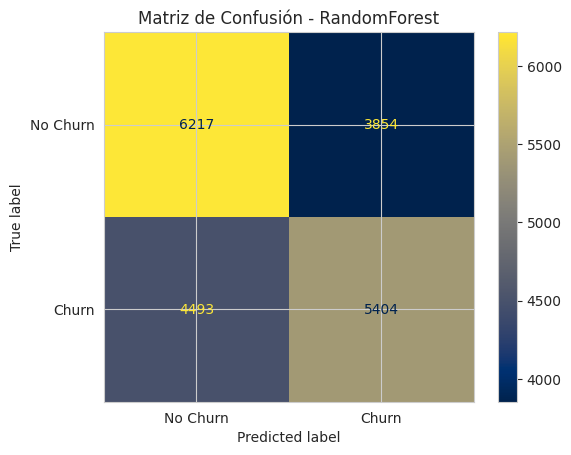


--- ENTRENANDO Y EVALUANDO MODELO: XGBoost ---
Entrenando XGBoost...
¡Modelo entrenado!

--- AUC en Test: 0.6264 ---

--- Informe de Clasificación en Test ---
              precision    recall  f1-score   support

    No Churn       0.59      0.60      0.60     10071
       Churn       0.59      0.58      0.58      9897

    accuracy                           0.59     19968
   macro avg       0.59      0.59      0.59     19968
weighted avg       0.59      0.59      0.59     19968



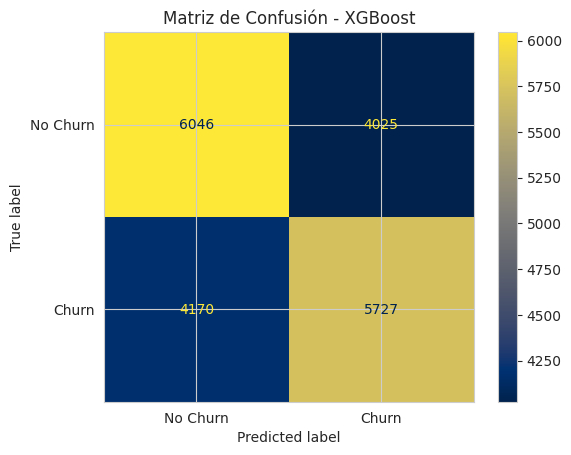


--- ENTRENANDO Y EVALUANDO MODELO: LightGBM ---
Entrenando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39578, number of negative: 40252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1577
[LightGBM] [Info] Number of data points in the train set: 79830, number of used features: 145
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
¡Modelo entrenado!

--- AUC en Test: 0.6361 ---

--- Informe de Clasificación en Test ---
              precision    recall  f1-score   support

    No Churn       0.60      0.60      0.60     10071
       Churn       0.59      0.60      0.59      9897

    accuracy                         

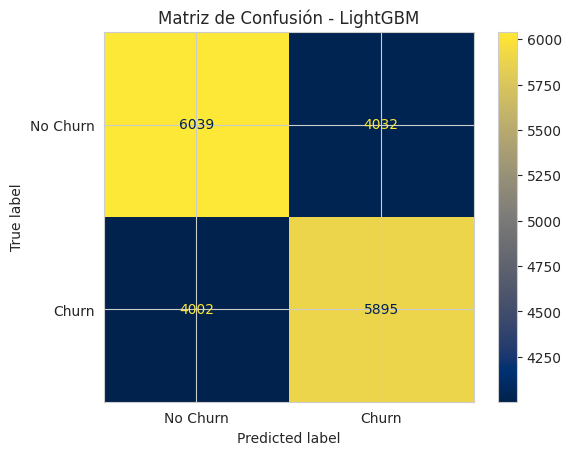

In [ ]:
all_results = []


rf_results = train_and_evaluate_model('RandomForest', rf_params, X_train_encoded_filtered_grouped, y_train, X_test_aligned_filtered_grouped, y_test)
all_results.append(rf_results)

xgb_results = train_and_evaluate_model('XGBoost', xgb_params, X_train_encoded_filtered_grouped, y_train, X_test_aligned_filtered_grouped, y_test)
all_results.append(xgb_results)

lgbm_results = train_and_evaluate_model('LightGBM', lgbm_params, X_train_encoded_filtered_grouped, y_train, X_test_aligned_filtered_grouped, y_test)
all_results.append(lgbm_results)

### Tuning para LightGBM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

# 1. Define el "espacio de búsqueda": qué hiperparámetros queremos probar y con qué rangos de valores
# Estos son algunos de los más importantes para LightGBM
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [20, 31, 40, 50], # Controla la complejidad de los árboles
    'max_depth': [-1, 10, 15], # -1 significa sin límite
    'reg_alpha': [0.1, 0.5, 1.0], # Regularización L1
    'reg_lambda': [0.1, 0.5, 1.0], # Regularización L2
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0] # Porcentaje de features a usar por cada árbol
}

# 2. Crea el modelo base (sin entrenar)
lgbm = LGBMClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# 3. Configura la búsqueda aleatoria
# n_iter=30 probará 30 combinaciones al azar. Puedes aumentar este número si tienes tiempo.
# cv=3 usará 3 folds de cross-validation.
random_search = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_dist, 
    n_iter=30, 
    cv=3, 
    scoring='roc_auc', 
    random_state=42, 
    n_jobs=-1,
    verbose=1 # Para que nos vaya contando qué está haciendo
)

print("--- Iniciando optimización de hiperparámetros para LightGBM (esto puede tardar varios minutos)... ---")
# 4. Ejecuta la búsqueda (SOLO con los datos de entrenamiento)
random_search.fit(X_train_final, y_train)
print("¡Optimización completada!")

# 5. Muestra los mejores parámetros encontrados
print("\nMejores hiperparámetros encontrados:")
print(random_search.best_params_)

# 6. Muestra la mejor "nota" media obtenida en la validación cruzada
print(f"\nMejor AUC medio en Cross-Validation: {random_search.best_score_:.4f}")

# 7. Guarda tu modelo ya optimizado
best_lgbm_model = random_search.best_estimator_

# --- Ahora, evaluamos este modelo optimizado en el TEST SET ---
print("\n--- Evaluando el modelo optimizado en el Test Set... ---")
y_pred_tuned = best_lgbm_model.predict(X_test_final)
y_pred_proba_tuned = best_lgbm_model.predict_proba(X_test_final)[:, 1]

auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"\n--- AUC en Test (LightGBM Optimizado): {auc_tuned:.4f} ---")
print("\n--- Informe de Clasificación (LightGBM Optimizado) ---")
print(classification_report(y_test, y_pred_tuned, target_names=['No Churn', 'Churn']))

In [ ]:
# La herramienta 'create_ratio' sigue siendo necesaria
def create_ratio(df, numerator_col, denominator_col, new_col_name, handle_inf_with=0):
    """Crea una nueva feature dividiendo dos columnas existentes de forma segura."""
    df_out = df.copy()
    epsilon = 1e-6
    new_col = df_out[numerator_col] / (df_out[denominator_col] + epsilon)
    new_col = new_col.replace([np.inf, -np.inf], np.nan).fillna(handle_inf_with)
    df_out[new_col_name] = new_col
    return df_out


def engineer_features(df):
    """
    Aplica la secuencia completa de FEATURE ENGINEERING a un DataFrame ya preprocesado.
    """
    print(f"Iniciando feature engineering (tamaño inicial: {df.shape})...")
    df_engineered = df.copy()
    
    # --- Herramienta 1: Ratios ---
    # Nota: Los ratios se deben crear ANTES del One-Hot Encoding, así que ajustamos el flujo.
    # Esta función ahora debería recibir el dataframe ANTES de get_dummies.
    # (Vamos a ajustar el flujo principal abajo para reflejar esto)
    df_engineered = create_ratio(df_engineered, 'rev_Mean', 'months', 'rev_per_month')
    df_engineered = create_ratio(df_engineered, 'mou_Mean', 'months', 'mou_per_month')
    df_engineered = create_ratio(df_engineered, 'change_mou', 'mou_Mean', 'change_mou_relative')
    
    # --- Herramienta 2: Binning ---
    bins = [-1, 90, 365, 730, df_engineered['eqpdays'].max()]
    labels = ['Equipo_Nuevo', 'Equipo_Seminuevo', 'Equipo_Antiguo', 'Equipo_Muy_Antiguo']
    df_engineered['eqpdays_binned'] = pd.cut(df_engineered['eqpdays'], bins=bins, labels=labels)

    print(f"Feature engineering completado. Nuevo tamaño: {df_engineered.shape}")
    return df_engineered

In [ ]:
def preprocess_data(df, imputation_values=None, train_cols_for_alignment=None):
    """
    Aplica la secuencia completa de PREPROCESAMIENTO a un DataFrame.
    (Limpieza, conversión de tipos, imputación y One-Hot Encoding).
    """
    print(f"Iniciando preprocesamiento (tamaño inicial: {df.shape})...")
    df_processed = df.copy()

    # --- 1. Limpieza Inicial ---
    if 'Customer_ID' in df_processed.columns:
        df_processed = df_processed.drop(columns=['Customer_ID'])
    
    # --- ¡NUEVO PASO! Gestionar valores infinitos ---
    # Reemplazamos cualquier 'inf' o '-inf' por NaN para que se puedan imputar después.
    df_processed.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # --- 2. Definición y Conversión de Tipos de Columnas ---
    numerical_cols = df_processed.select_dtypes(include=np.number).columns.drop(TARGET, errors='ignore').tolist()
    categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
    
    binary_cols = [
        col for col in numerical_cols 
        if df_processed[col].nunique(dropna=True) == 2 and set(df_processed[col].dropna().unique()) <= {0, 1, 0.0, 1.0}
    ]
    for col in binary_cols:
        df_processed[col] = df_processed[col].astype(int).astype('category')
        if col in numerical_cols:
            numerical_cols.remove(col)
        if col not in categorical_cols:
            categorical_cols.append(col)
            
    # --- 3. Imputación de Nulos ---
    if imputation_values:
        print("Aplicando imputación con valores del set de entrenamiento...")
        df_processed.fillna(value=imputation_values, inplace=True)

    # --- 4. One-Hot Encoding ---
    df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)
    
    # --- 5. Alineación de Columnas (para el test set) ---
    if train_cols_for_alignment is not None:
        print("Alineando columnas con el set de entrenamiento...")
        df_processed = df_processed.reindex(columns=train_cols_for_alignment, fill_value=0)
    
    print(f"Preprocesamiento completado. Nuevo tamaño: {df_processed.shape}")
    return df_processed

### Reducción de dimensionalidad

Entre PCA y Random Forest, por interpretabilidad, se escoge Random Forest, ya que PCA proyecta en dimensiones que complican la interpretación de las variables elegidas. Dado que se busca adoptar mejores alternativas de negocio y disminuir el churn, se escoge esta opción.

In [ ]:
X_train = df_train.drop(columns=[TARGET])
y_train = df_train[TARGET]

X_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)

print("DataFrame original:", X_train.shape)
print("DataFrame codificado:", X_encoded.shape)

DataFrame original: (79830, 107)
DataFrame codificado: (79830, 190)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y_train)

feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("--- Top 20 Variables Más Importantes ---")
print(feature_importance.head(40))

--- Top 20 Variables Más Importantes ---
            feature  importance
65          eqpdays    0.031226
9        change_mou    0.024119
48           months    0.023173
52           adjrev    0.019895
51           totrev    0.019833
1          mou_Mean    0.019785
57           avgqty    0.019633
10       change_rev    0.019284
55           avgrev    0.019127
56           avgmou    0.018888
0          rev_Mean    0.018489
49         totcalls    0.018364
54           adjqty    0.018212
58          avg3mou    0.018197
50           totmou    0.018140
53           adjmou    0.018001
61          avg6mou    0.016914
37    mou_peav_Mean    0.016906
28    mou_cvce_Mean    0.016790
41    mou_opkv_Mean    0.016683
59          avg3qty    0.016622
62          avg6qty    0.016255
32  mouowylisv_Mean    0.016209
2       totmrc_Mean    0.016024
30    mou_rvce_Mean    0.015706
35    peak_vce_Mean    0.015381
63          avg6rev    0.015200
39     opk_vce_Mean    0.015103
15    unan_vce_Mean    0.014940

### Elbow Method para elegir el número de variables

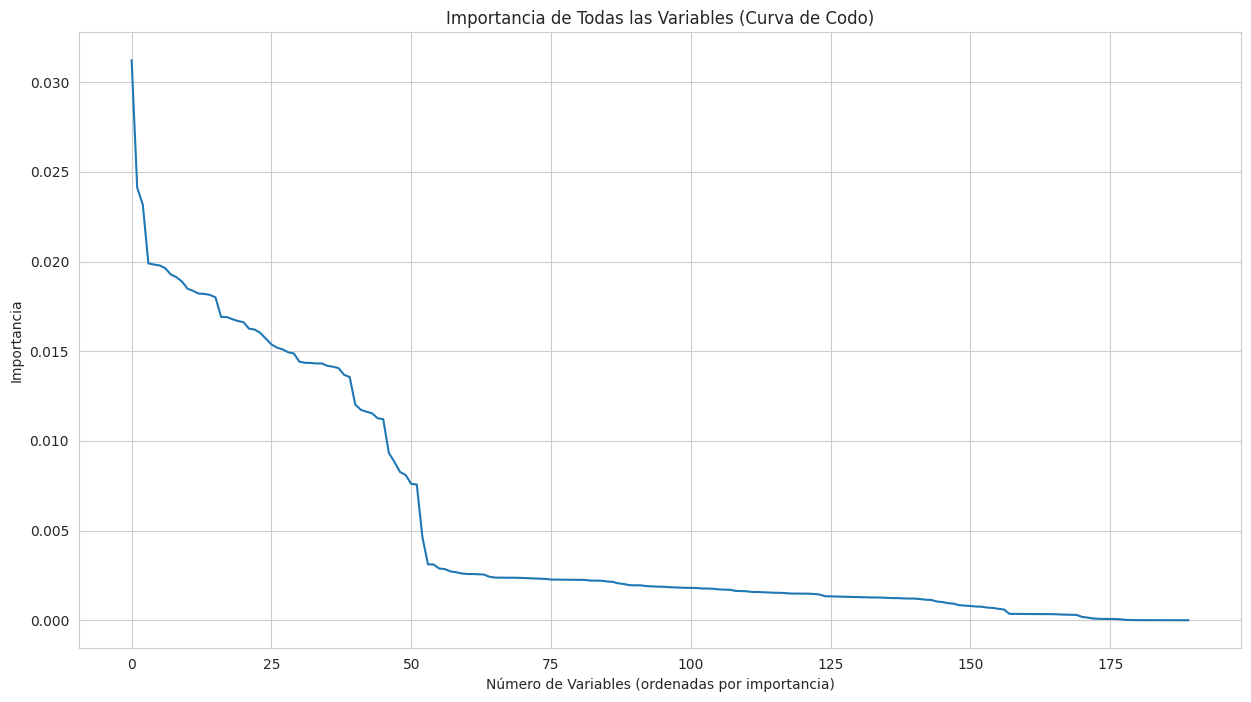

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(feature_importance)), feature_importance['importance'])
plt.title('Importancia de Todas las Variables (Curva de Codo)')
plt.xlabel('Número de Variables (ordenadas por importancia)')
plt.ylabel('Importancia')
plt.grid(True)
plt.show()

In [ ]:
k = 50

final_features = feature_importance['feature'].head(k).tolist()

print(final_features)

X_train_final = X_encoded[final_features]
y_train = y_train
df_final_train = pd.concat([X_train_final, y_train], axis=1)
df_final_train.head()

['eqpdays', 'change_mou', 'months', 'adjrev', 'totrev', 'mou_Mean', 'avgqty', 'change_rev', 'avgrev', 'avgmou', 'rev_Mean', 'totcalls', 'adjqty', 'avg3mou', 'totmou', 'adjmou', 'avg6mou', 'mou_peav_Mean', 'mou_cvce_Mean', 'mou_opkv_Mean', 'avg3qty', 'avg6qty', 'mouowylisv_Mean', 'totmrc_Mean', 'mou_rvce_Mean', 'peak_vce_Mean', 'avg6rev', 'opk_vce_Mean', 'unan_vce_Mean', 'avg3rev', 'comp_vce_Mean', 'recv_vce_Mean', 'owylis_vce_Mean', 'attempt_Mean', 'complete_Mean', 'plcd_vce_Mean', 'drop_blk_Mean', 'inonemin_Mean', 'drop_vce_Mean', 'mouiwylisv_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'hnd_price', 'iwylis_vce_Mean', 'blck_vce_Mean', 'vceovr_Mean', 'cc_mou_Mean', 'da_Mean', 'roam_Mean', 'ccrndmou_Mean']


,eqpdays,change_mou,months,adjrev,totrev,mou_Mean,avgqty,change_rev,avgrev,avgmou,rev_Mean,totcalls,adjqty,avg3mou,totmou,adjmou,avg6mou,mou_peav_Mean,mou_cvce_Mean,mou_opkv_Mean,avg3qty,avg6qty,mouowylisv_Mean,totmrc_Mean,mou_rvce_Mean,peak_vce_Mean,avg6rev,opk_vce_Mean,unan_vce_Mean,avg3rev,comp_vce_Mean,recv_vce_Mean,owylis_vce_Mean,attempt_Mean,complete_Mean,plcd_vce_Mean,drop_blk_Mean,inonemin_Mean,drop_vce_Mean,mouiwylisv_Mean,ovrmou_Mean,ovrrev_Mean,hnd_price,iwylis_vce_Mean,blck_vce_Mean,vceovr_Mean,cc_mou_Mean,da_Mean,roam_Mean,ccrndmou_Mean,churn
0,601.0,-704.00,20,2257.35,2312.52,784.00,409.95,-86.7125,118.81,840.00,137.4925,7810,7789,1019,15986.0,15960.0,941.0,462.530000,286.536667,97.650000,445,441.0,23.993333,50.0000,273.643333,204.000000,143.0,63.333333,19.666667,166,180.333333,91.333333,33.666667,233.000000,180.333333,233.000000,34.000000,30.333333,3.333333,0.000000,272.50,81.750,59.98999,0.000000,30.666667,81.750,0.000000,3.96,1.7825,0.0,1
1,156.0,264.75,19,1017.85,1107.83,1702.25,254.47,-9.0750,59.87,1344.29,59.0650,4333,4326,1614,22876.0,22853.0,1458.0,367.333333,846.830000,761.720000,285,277.0,191.696667,59.9900,282.223333,103.333333,57.0,122.333333,41.333333,62,179.666667,47.000000,79.333333,235.666667,179.666667,235.666667,15.666667,15.666667,9.000000,62.930000,30.25,9.075,199.98999,12.666667,6.666667,9.075,1.843333,0.00,0.0000,2.0,0
2,1009.0,-70.25,33,1139.68,1194.37,185.25,64.59,-11.5000,39.30,193.86,44.4700,1928,1873,209,5774.0,5622.0,200.0,104.316667,123.030000,24.690000,81,70.0,1.860000,30.0000,5.976667,52.666667,40.0,16.000000,13.333333,48,64.000000,7.333333,2.000000,78.333333,64.000000,78.333333,1.000000,5.333333,1.000000,0.000000,28.75,11.500,29.98999,0.000000,0.000000,11.500,0.000000,2.97,0.0000,0.0,0
3,334.0,-3.75,11,290.96,350.94,10.75,8.20,-0.2550,29.10,14.40,28.7450,85,82,12,150.0,144.0,13.0,0.000000,0.000000,0.000000,7,8.0,0.000000,39.9900,0.000000,0.000000,29.0,0.000000,0.000000,29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000,149.98999,0.000000,0.000000,0.000,0.000000,0.00,0.0000,0.0,0
4,223.0,84.50,7,581.85,667.73,1757.50,343.50,-30.2025,96.98,1494.83,109.1925,2074,2061,1729,9107.0,8969.0,1495.0,508.236667,1184.570000,895.386667,355,344.0,97.853333,82.6925,219.053333,222.000000,97.0,215.000000,159.333333,119,349.000000,175.666667,59.666667,528.333333,349.000000,528.333333,21.000000,127.000000,19.666667,67.196667,113.75,45.500,129.98999,14.000000,1.333333,45.500,40.876667,0.00,0.0000,65.0,1


In [ ]:
import sys
import os

# Obtenemos la ruta del directorio actual del notebook (que será '.../notebooks')
notebook_dir = os.getcwd()
# Subimos un nivel para llegar a la raíz del proyecto ('.../churn-estimation')
project_root = os.path.dirname(notebook_dir)

# Añadimos la raíz del proyecto a la lista de rutas donde Python busca módulos
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Raíz del proyecto añadida al path: {project_root}")

Raíz del proyecto añadida al path: /home/paloma/churn-estimation


## Comparación de resultados

In [ ]:
# Creamos un DataFrame a partir de la lista de resultados
# Excluimos la columna del objeto del modelo para que la tabla sea más limpia
results_df = pd.DataFrame([res for res in all_results])
results_df_cleaned = results_df.drop(columns=['model_object'])

# Ordenamos por la métrica que más nos interese (ej. AUC) para ver al campeón
results_df_cleaned.sort_values(by='AUC Test', ascending=False)

,model_name,AUC Test,F1-Score Churn
2,LightGBM,0.681248,0.636708
1,XGBoost,0.669039,0.617206
0,RandomForest,0.661473,0.605996



--- ENTRENANDO Y EVALUANDO MODELO: LightGBM ---
Entrenando LightGBM...
[LightGBM] [Info] Number of positive: 39578, number of negative: 40252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12673
[LightGBM] [Info] Number of data points in the train set: 79830, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
¡Modelo entrenado!

--- AUC en Test: 0.6822 ---

--- Informe de Clasificación en Test ---
              precision    recall  f1-score   support

    No Churn       0.64      0.60      0.62     10071
       Churn       0.62      0.66      0.64      9897

    accuracy                           0.63     19968
   macro avg       0.63      0.63      0.63     19968
weighted 

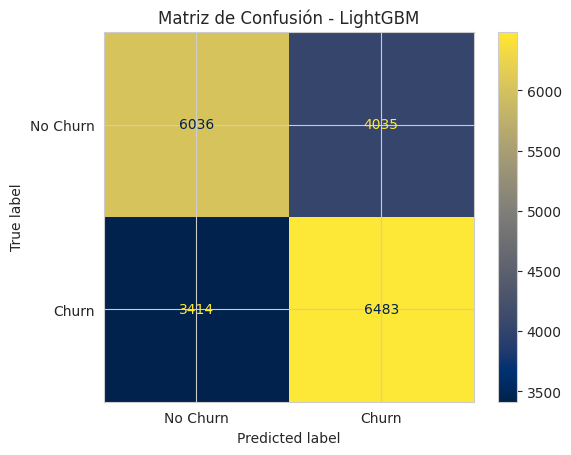

In [ ]:
X_train_final_60 = X_train[feature_importance['feature'].head(60).tolist()]
X_test_final_60 = X_test[feature_importance['feature'].head(60).tolist()]

lgbm_results_60 = train_and_evaluate_model('LightGBM', lgbm_params, X_train_final_60, y_train, X_test_final_60, y_test)


### Creación de ratios

In [ ]:
def create_ratio(df, numerator_col, denominator_col, new_col_name, handle_inf_with=0):
    """
    Crea una nueva feature dividiendo dos columnas existentes de forma segura.

    Args:
        df (pd.DataFrame): El DataFrame a modificar.
        numerator_col (str): El nombre de la columna del numerador.
        denominator_col (str): El nombre de la columna del denominador.
        new_col_name (str): El nombre de la nueva columna de ratio.
        handle_inf_with (float, optional): Valor con el que rellenar los infinitos/NaNs. 
                                            Defaults to 0.

    Returns:
        pd.DataFrame: El DataFrame con la nueva columna añadida.
    """
    # epsilon es un número diminuto para evitar la división por cero
    epsilon = 1e-6
    
    print(f"Creando feature de ratio: '{new_col_name}'...")
    df[new_col_name] = df[numerator_col] / (df[denominator_col] + epsilon)
    
    # Reemplazamos los posibles valores infinitos (si epsilon no fuera suficiente) por NaN
    df[new_col_name].replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Rellenamos cualquier NaN que haya quedado con el valor especificado
    df[new_col_name].fillna(handle_inf_with, inplace=True)
    
    return df

In [ ]:
def apply_feature_engineering(df):
    """
    Aplica toda la secuencia de creación de nuevas características a un DataFrame.
    Esta es nuestra "receta" maestra.
    """
    # Hacemos una copia para no modificar el DataFrame original por accidente
    df_out = df.copy()
    
    print(f"Aplicando feature engineering al DataFrame (tamaño inicial: {df_out.shape})...")
    
    # --- Herramienta 1: Ratios (usando nuestra función genérica) ---
    df_out = create_ratio(df_out, 'mou_Mean', 'months', 'mou_per_month')
    df_out = create_ratio(df_out, 'rev_Mean', 'mou_Mean', 'rev_per_minute')
    df_out = create_ratio(df_out, 'change_mou', 'mou_Mean', 'change_mou_relative')
    
    print(f"Feature engineering aplicado. Nuevo tamaño: {df_out.shape}")
    return df_out

In [ ]:
print("Procesando el set de entrenamiento...")
df_train_with_features = apply_feature_engineering(df_train)

print("\nProcesando el set de prueba...")
df_test_with_features = apply_feature_engineering(df_test_processed)

### Agrupación de variables numéricas

### Interacciones entre variables